## CA DATA PREPARATION AND MACHINE LEARNING

Student: Beatriz Lobão Silva Sena

Lecturer(s): David McQuaid, Marina Soledad and Muhammad Iqbal


ABSTRACT - The following study is based on the theories of data set characterization, data preparation application, Exploratory Data Analysis, PCA, LDA and Machine learning models. In this study, data from the focus is the provided Shill bidding were used in order to analyze the data through python software, demonstrating supervised machine learning throughout for fraud prediction on online shopping sites.

## Introduction
The dataset classifies whether the bids in a website is suspicious or. For this it has 6321 rows, each row being one user. To determine the fraud the dataset has 12 independent variables, which are: " Record ID ", "Auction ID", " Bidder ID ", " Bidder Tendency " "Bidding Ratio" " Successive Outbidding ", “Last_Bidding”" Auction Bids ", " Auction Starting Price”, “Early Bidding ", “Winning Ratio”, “Auction Duration”. The goal of the project is to test different machine learning models to complete which method is ideal for predicting the frauds on website betting to future sales. To do this, you will need to understand some essential concepts of data preparation, data visualization and machine learning. Predictive modeling is the technique of developing a model or function using historical data to predict new data. The difference between reduce the dataset using PCA or LDA methodology. The classification models that will be used are: Logistic regressor, Decision tree.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score     
from sklearn.metrics import confusion_matrix             
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression                     
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("databeatriz/Shill Bidding Dataset.csv")

The dataset that will be analyzed is about bids given at auctions promoted by a sales website. Sometimes some bids given in the auction are made by the sellers themselves, as a way to value their products and sell them more expensive. Given this in view this action needs to be banned by the website, but for this must first be identified the bids outside the normal range for each product. The variable dependent [CLASS] on the dataset shows, according to the independent variables, whether the bid is normal or not, so being possible to identify fraud.

In [3]:
df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [5]:
df.shape

(6321, 13)

First of all, the dataset contains 6321 rows and 13 variables. All variables are numerical, except Bidder ID.

In [6]:
df.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


## Missing Values

Data cleaning involves fixing problems or errors in messy data. There are many reasons why the data may have incorrect analyses such as duplicate, missing values and outliers. [1] However, when I checked this, it was verified that there were no missing values and duplicate rows. Therefore, the outliers are present in the dataset, but will not be treated, because of the high values given as bid by the sellers themselves probably fit the condition of outliers and is indispensable in the fraud analysis.

In [7]:
df.isna().any()

Record_ID                 False
Auction_ID                False
Bidder_ID                 False
Bidder_Tendency           False
Bidding_Ratio             False
Successive_Outbidding     False
Last_Bidding              False
Auction_Bids              False
Starting_Price_Average    False
Early_Bidding             False
Winning_Ratio             False
Auction_Duration          False
Class                     False
dtype: bool

## DUPLICATES

In [8]:
#Checking duplicates
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


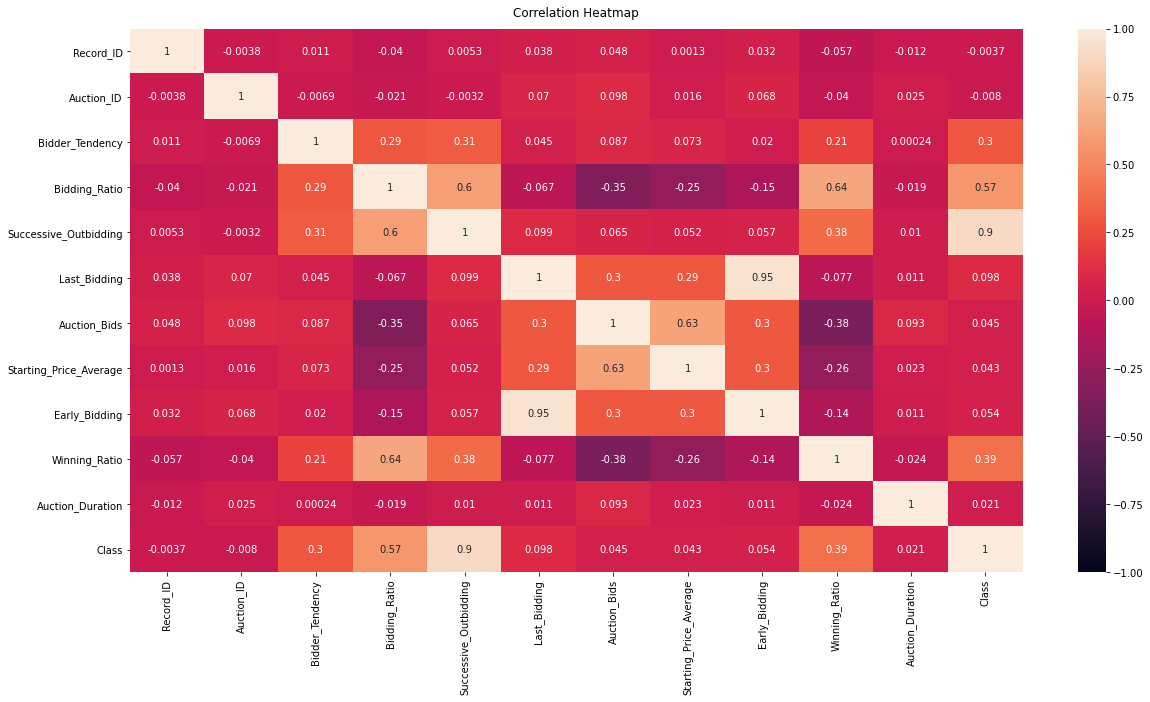

In [9]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 10))

# Set the range of values to be displayed on the colormap from -1 to 1
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Heat Maps are a type of plot which is allow us to find the dependent variables or the relationship between the features. In the heat map of the dataset, we can see that the Class has a strong and positive correlation with Successive Outbidding;  moderate and positive correlation with Bidding Ratio; weak and positive with Winning Ratio and Bidder Tendency. 
These are the columns that most affect the dependent variable.

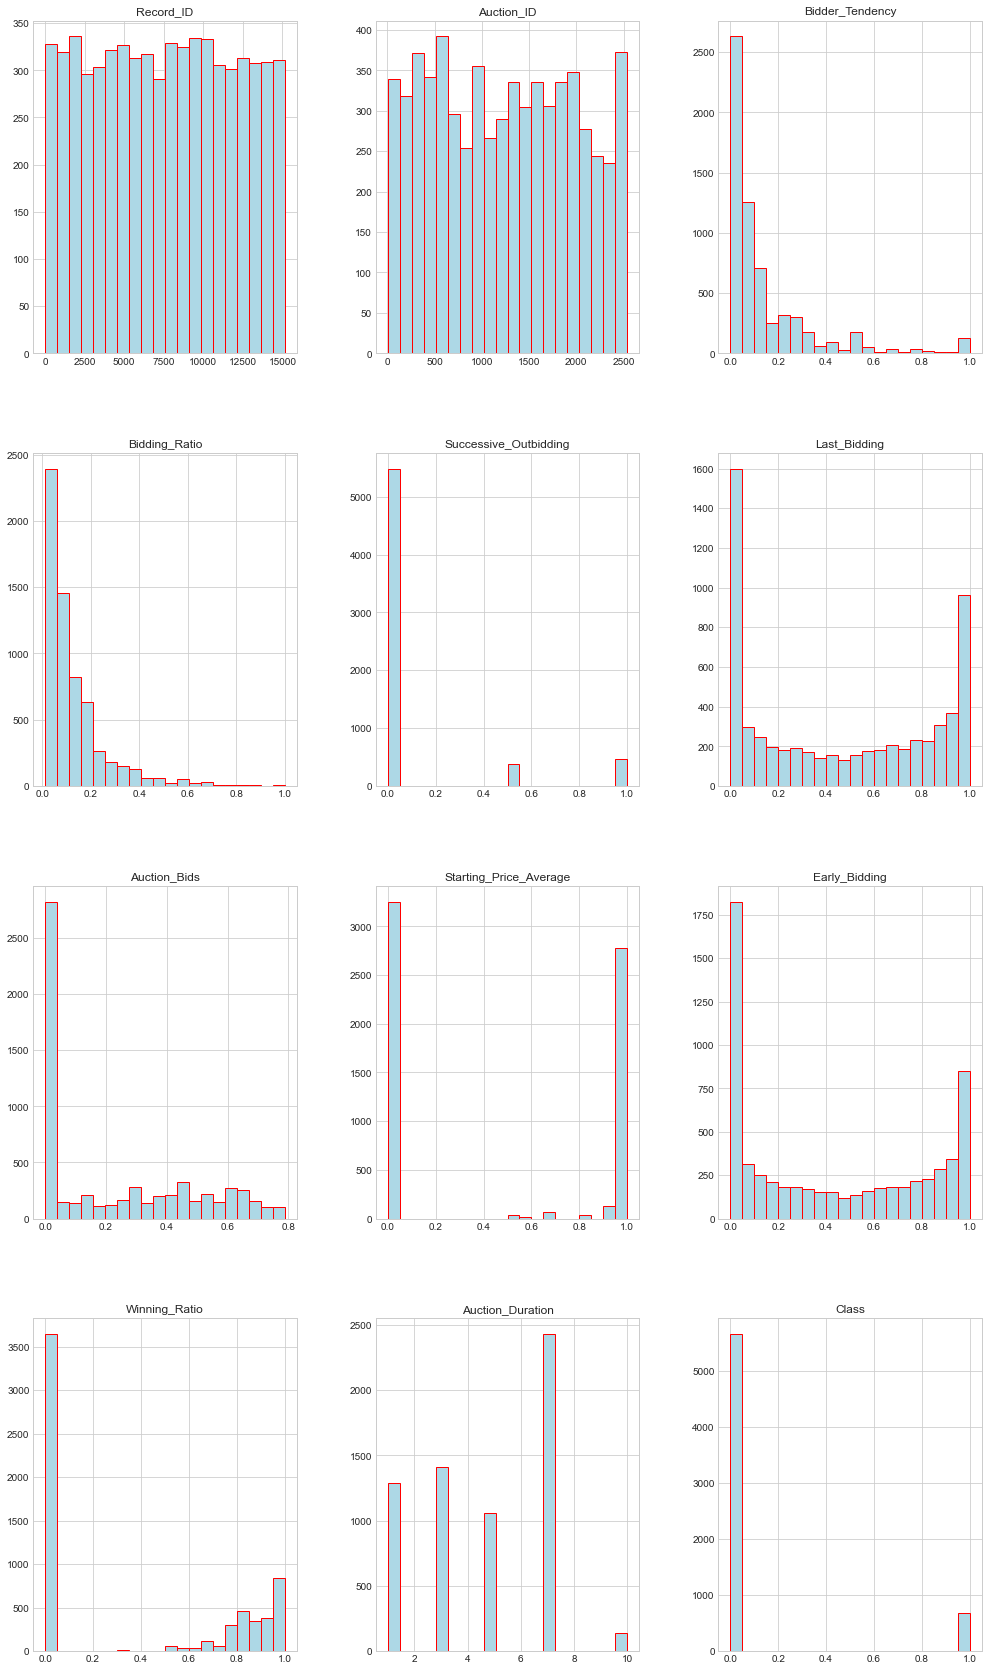

In [10]:
plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(17,30), color='lightblue', edgecolor = 'red')
plt.show()

Among the plotted histograms it is important to highlight that of the variable dependent class. Analyzing the histogram of this variable is noticeable that more than 5000 values are considered normal and only approximately 11% of bets do not show normal behavior. The number of normal and abnormal bets are very discrepant, which makes the dataset considered imbalanced. The class imbalance is a serious fact in fraud detection as it deteriorates the classification performance and it may also misclassify the minority class. Bidder Tendency and Bidding Ratio has a positiely skewed distribution. Successive Outbidding shows that most people do not bid higher if they have already purchased the product, those who bid higher after purchasing the product are suspected of fraud.

In [11]:
df.Bidder_ID.value_counts()

a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
j***g      1
t***3      1
6***f      1
g***y      1
n***p      1
Name: Bidder_ID, Length: 1054, dtype: int64

In [12]:
df = df.drop(columns='Bidder_ID')

To identify outliers, I plotted a boxplot graphic. In the plot, you can find some points are that outside the “box”.
Analyzing the boxplots it is clear that the start price has no outliers, since most bids are based on the starting price. Bidder tendency is a shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice. So it was expect once this buyers are given higher bit than the products really value, trying to increase the values of the products as a fraud. Bidding Ratio are participants who bid above the value of the product to force honest buyers to raise their bets. These stakes higher than the value that the product is worth generates outliers as we can see in the chart. Successive Outbidding even having already won the auction of the product the user still of higher bids, to increase the value of the product. This attitude is totally suspicious and generates bids above the standard of the product, thus generating outliers. The outliers are of extreme importance to analyze this dataset, as they suggest that the above-normal values of bets as fraudulent. For this reason they will not be treated and will be used to predict future fraud.


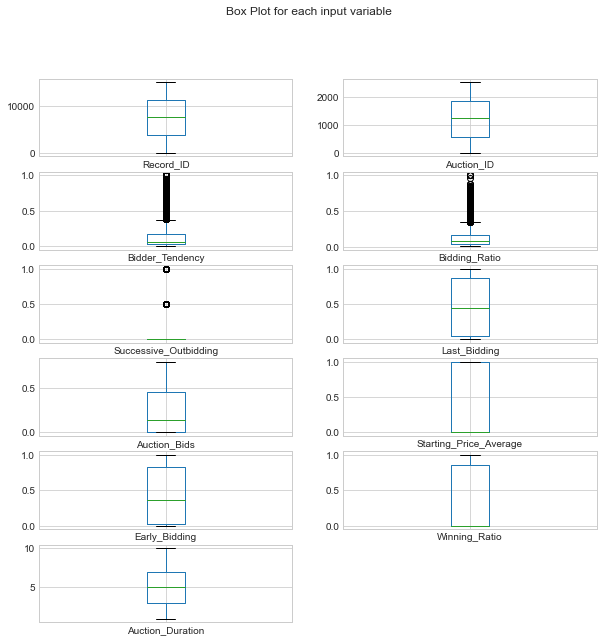

In [13]:
df.drop('Class', axis=1).plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(10,10), title='Box Plot for each input variable')
plt.show()

## Data preparation

Data scaling is a recommended pre-processing step when working with many machine
learning algorithms, because it improve the performance of predictive modeling algorithms. I chose the min-max scale as a way to scale the dataset, because most of the columns are already within this range. Normalization by placing the dataset valuees between 0 and 1 will only be required for three columns:'Auction_ID',  'Auction_Duration', 'Record_ID'. When we have all features normalized within one range it will help PCA, LDA and ML models run with the better accuracy. 

In [14]:
df1 = df[['Auction_ID','Auction_Duration','Record_ID']]
df2 = df.drop(columns = ['Auction_ID','Auction_Duration', 'Record_ID'])
minmax = MinMaxScaler().fit(df1)
minmax = minmax.transform(df1)


In [15]:
df1 = pd.DataFrame(minmax, columns = ['Auction_ID','Auction_Duration', 'Record_ID'])
df1

,Auction_ID,Auction_Duration,Record_ID
0,0.287011,0.444444,0.000000
1,0.287011,0.444444,0.000066
2,0.287011,0.444444,0.000132
3,0.287011,0.444444,0.000198
4,0.353336,0.666667,0.000264
...,...,...,...
6316,0.298066,0.222222,0.999009
6317,0.977497,0.666667,0.999538
6318,0.977497,0.666667,0.999604
6319,0.977497,0.666667,0.999670


In [16]:
df = df1.join(df2)
df

,Auction_ID,Auction_Duration,Record_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Class
0,0.287011,0.444444,0.000000,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,0
1,0.287011,0.444444,0.000066,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,0
2,0.287011,0.444444,0.000132,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,0
3,0.287011,0.444444,0.000198,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,0
4,0.353336,0.666667,0.000264,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6316,0.298066,0.222222,0.999009,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,1
6317,0.977497,0.666667,0.999538,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,0
6318,0.977497,0.666667,0.999604,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,0
6319,0.977497,0.666667,0.999670,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Auction_ID              6321 non-null   float64
 1   Auction_Duration        6321 non-null   float64
 2   Record_ID               6321 non-null   float64
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Class                   6321 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 592.7 KB


## Balancing

In the dataset being analyzed is clearly imbalance. We can see this in the graph below which shows the ratio of class as 1 and 0. This is because most of the bets are from real buyers, and only a small part of buyers who are trying to commit fraud. Class imbalance consists in a disproportion of the number of examples of the different classes in the problem. This issue is known to hinder the performance of classifiers due to their accuracy. The dataset can be balanced in two ways: undersampling, that consists of reducing the data by eliminating examples belonging to the majority class with the objective of equalizing the number of examples of each class; and oversampling, that aims to replicate or generate new positive examples in order to gain importance. Oversampling generates new examples without worrying about the neighboring points of the majority class, thus increasing the transposition between classes, which can end up introducing noise into the data, however, it solves the problem of unbalanced data. Undersampling eliminates examples that are more likely to be causing data noise, but does not solve the problem of imbalance the way we need to. For that reason I decided to apply the combination of oversampling using SMOTE.


<AxesSubplot:xlabel='Class', ylabel='count'>

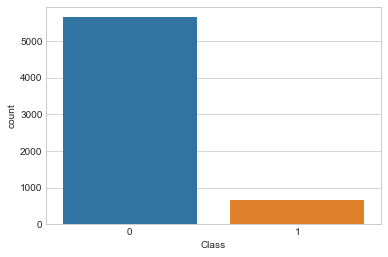

In [18]:
# Let's check data distribution of class type.
sns.countplot(x='Class',data=df)

In [19]:
# Clearly, we have data imbalance here. 
df['Class'].value_counts()

0    5646
1     675
Name: Class, dtype: int64

In [20]:
balance = (df.Class.value_counts()[1]/df.Class.shape[0])*100
print('Data Quality Percentage:\n', balance,'%')

Data Quality Percentage:
 10.678690080683436 %


<AxesSubplot:xlabel='Class', ylabel='count'>

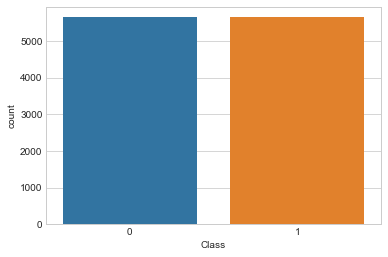

In [21]:
x = df.drop(columns='Class', axis = 1) 
y = df['Class']

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(x, y)

sns.countplot(Y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## LDA

LDA is a supervised dimensionality reduction technique. LDA is linear transformation techniques, the idea is find a linear combination of features that are able to separate two or more classes[15]. In contrast of PCA, it focuses on maximizing the separability and create a new linear axis and project the data points on that axis. LDA focus at what type of point or features gives more discrimination to separate the data.[16] Explained variance ratio is the percentage of the total variance of the data that is explained by each component. It indicates the amount of variance each component of LDA holds after projecting the original data into the two-dimensional space. As a result, we have that the only one component was chosen by LDA, that represent well the influence a variable dependent. After that I created a new dataset joining what I want to predict is fraud ('Class') with the column that was chosen by the LDA. Note: PCA and LDA were applied to test machine learning models.

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
x_lda = lda.fit_transform(X, Y)

In [24]:
lda.explained_variance_ratio_

array([1.])

In [25]:
df_lda = pd.DataFrame(data = x_lda, columns = ['LDA 1'])
df_lda

,LDA 1
0,-2.087701
1,-1.824095
2,-1.749264
3,-1.749933
4,-2.340288
...,...
11287,2.687727
11288,3.347273
11289,3.052903
11290,2.927445


Text(0, 0.5, 'Class')

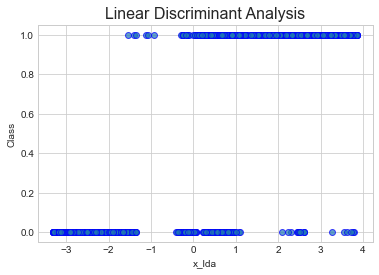

In [26]:
plt.scatter(x_lda, Y, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title('Linear Discriminant Analysis', fontsize = 16)
plt.xlabel('x_lda')
plt.ylabel('Class')

In [27]:
df_lda_class = df_lda.join(Y)
df_lda_class

,LDA 1,Class
0,-2.087701,0
1,-1.824095,0
2,-1.749264,0
3,-1.749933,0
4,-2.340288,0
...,...,...
11287,2.687727,1
11288,3.347273,1
11289,3.052903,1
11290,2.927445,1


## LDA - IMBALANCE

In addition to the LDA in the scaled and balanced dataset I applied the LDA only in the scaled dataset, this was done with the aim of comparing the yields of the machine learning models that will be applied. The result of it was also that only one column was chosen, but this column has the same number of rows as the original dataset, not the number of rows in the balanced dataset.

In [28]:
x = df.drop(columns='Class', axis = 1) 
y_imb = df['Class']
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
x_lda_imb = lda.fit_transform(x, y_imb)

In [29]:
lda.explained_variance_ratio_

array([1.])

In [30]:
df_lda_imb = pd.DataFrame(data = x_lda_imb, columns = ['LDA 1'])
df_lda_imb

,LDA 1
0,-0.691356
1,-0.622038
2,-0.592784
3,-0.588963
4,-0.794470
...,...
6316,7.405951
6317,-0.691188
6318,-1.005609
6319,-0.983157


Text(0, 0.5, 'Class')

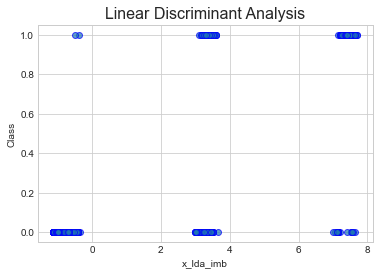

In [31]:
plt.scatter(x_lda_imb, y_imb, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title('Linear Discriminant Analysis', fontsize = 16)
plt.xlabel('x_lda_imb')
plt.ylabel('Class')

In [32]:
df_lda_class_imb = df_lda_imb.join(y_imb)
df_lda_class_imb

,LDA 1,Class
0,-0.691356,0
1,-0.622038,0
2,-0.592784,0
3,-0.588963,0
4,-0.794470,0
...,...,...
6316,7.405951,1
6317,-0.691188,0
6318,-1.005609,0
6319,-0.983157,0


## PCA 

PCA is unsupervised dimensionality reduction technique. It is a statistical linear algebra procedure that can be used to automatically perform dimensionality reduction. It converts a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. [1]It create a projection of a dataset prior to fitting a model. Explained variance ratio is the percentage of the total variance of the data that is explained by each component. Using the same number of features of LDA (1) the PCA just provide 30,71% of percentage of variance explained, This means that by reducing to the same number of columns the LDA performed much better than the PCA, therefore the ML models will be applied using only the variables obtained in the LDA.

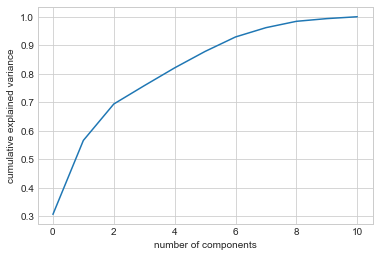

In [33]:
pca = PCA()
projected = pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [34]:
projected = pca.fit_transform(X)

In [35]:
print (pca.n_components_)

11


In [36]:
projected.shape

(11292, 11)

In [37]:
pca.explained_variance_ratio_

array([0.30712783, 0.2593572 , 0.12765627, 0.06418829, 0.06253628,
       0.05755923, 0.05076541, 0.03255109, 0.02221992, 0.0095111 ,
       0.00652737])

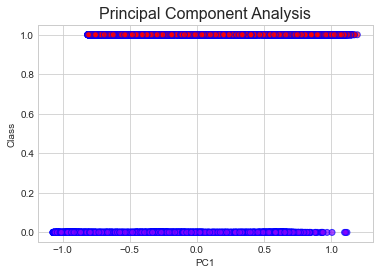

In [38]:
plt.title('Principal Component Analysis', fontsize = 16)
plt.xlabel('PC1')
plt.ylabel('Class')
plt.scatter(
    projected[:,0],
    Y,
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

## PCA - Imbalance

In addition to the PCA in the scaled and balanced dataset I applied the PCA only on the scaled dataset. The result of it was also that the first column represents 33.57% of influence on the dependent variable. Furthermore, the dataset applying the just scaled PCA has the same number of rows as the original dataset, and not the number of rows of the balanced dataset.

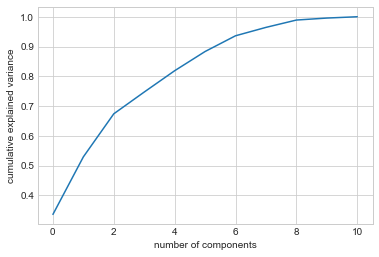

In [39]:
pca_imb = PCA()
projected = pca_imb.fit(x)
plt.plot(np.cumsum(pca_imb.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [40]:
projected = pca_imb.fit_transform(x)

In [41]:
pca_imb.explained_variance_ratio_

array([0.33571701, 0.19340405, 0.14472665, 0.07313382, 0.07162555,
       0.06458276, 0.05287457, 0.02818173, 0.02464651, 0.00668656,
       0.00442079])

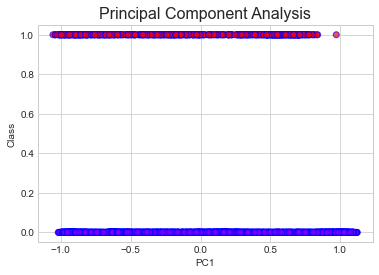

In [42]:
plt.title('Principal Component Analysis', fontsize = 16)
plt.xlabel('PC1')
plt.ylabel('Class')
plt.scatter(
    projected[:,0],
    y_imb,
    c=y_imb,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

## MACHINE LEARNING Modeling

All machine learning models applied used the parameters of test_size=0.35, random_state=42. This was due to the fact that if we want to compare the models, it must follow the same application parameters.

Supervised learning is the most common way of implementing machine learning. It works for cases like fraud detection in deep learning environments. In a supervised learning model, all input information has to be labeled as good or bad. A supervised learning model is based on predictive data analysis and is only as accurate as the training set provided for it. A major drawback of the supervised model is that it’s not able to detect fraud that was not included in the historical data set from which it learned.[17]

An unsupervised learning model is meant to detect anomalous behavior in cases where there is little transaction data or such data is not available at all. An unsupervised learning model continuously processes and analyzes new data and updates its models based on the findings. It learns to notice patterns and decide whether they’re parts of legitimate or fraudulent operations. Deep learning in fraud detection is usually associated with unsupervised learning algorithms.[17]

For future data prediction I chose supervised machine learning methods, as the dataset present it both fraudulent and nonfraudulent records, and the model then attempts to infer a function or instruction set that can predict whether fraud is present by applying it to new examples.

## LOGISTIC REGRESSION

Logistic Regression is the most popular supervised learning algorithm in machine learning and that's the reason why I chose this model as a supervised ML model.[11] Despite its name, Logistic Regression is a classification algorithm and not a regression algorithm. [5] Normally, it is used to predict the probability of event occurrence by fitting data to the logit function.The confusion matrix provides an exact distribution of the number of points that were incorrectly classified under each category. We can observed when we splited the data the total number of tests is 3953, 35% of the number of rows at LDA. 1940 0 class values as a true positive values, in our dataset thats the honest biddings. 53 were predicted as False Positive, predict as a honest bid but can be a fraud. Over 1954 1 class values, predict as a fraud and is a fraud, it means that if the fraud continue in the same frequecy if we have 3953 bids 1950 suggest a fraud. 6 was predicted as False Negative the model predict as a fraud and can be not a fraud. Testing score: 0.985 and Training score: 0.987. That's the accurancy of the model. With this value it is satisfactory to predict the results. With this amount it is satisfactory to predict the results for next bets and frauds of the online shopping site.

In [43]:
from sklearn.model_selection import train_test_split
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(x_lda, Y, test_size=0.35, random_state=42, shuffle=True)

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train_lda, y_train_lda)
y_pred_lda = logreg.predict(X_test_lda)

In [45]:
print('Training score: {:.3f}'.format(logreg.score(X_train_lda,y_train_lda)))
print('Testing score: {:.3f}'.format(logreg.score(X_test_lda,y_test_lda)))

Training score: 0.987
Testing score: 0.985


              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1993
           1       0.97      1.00      0.99      1960

    accuracy                           0.99      3953
   macro avg       0.99      0.99      0.99      3953
weighted avg       0.99      0.99      0.99      3953

AxesSubplot(0.125,0.125;0.775x0.755)


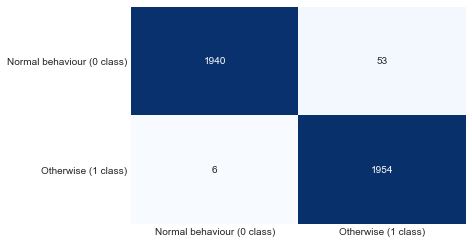

In [46]:
print(classification_report(y_test_lda, y_pred_lda))
print(sns.heatmap(confusion_matrix(y_test_lda, y_pred_lda), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

##  Logistic Regression - Hyperparameters and Cross Validation

In cross-validation, the dataset is randomly divided into "K" groups. When we set a number to "k", we use the number in place of "k" to reference the test. GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance. And it was using GridSearchCV that the best hyperparameters were chosen to be used. The difference between logistic regression with and without cross validation and hyperparameters was not significant, however with hyperparameters slightly better. It was possible to see this by confusion matrix where the number of hits is higher than in the printed confusion matrix applying logistic regression without hyperparameters. 1941 0 class values as a true positive values, in our dataset thats the honest biddings. 52 were predicted as False Positive, predict as a honest bid but can be a fraud. Over 1954 1 class values, predict as a fraud and is a fraud, it means that if the fraud continue in the same frequecy if we have 3953 bids 1950 suggest a fraud. 6 was predicted as False Negative the model predict as a fraud and can be not a fraud. Testing score: 0.985 and Training score: 0.987. Although approximate yield is the same we can see by the matrix confusion that the amount of true honest bets went up 1 and that consequently went down 1 point predict as false positive.

In [47]:
log_clf = LogisticRegression(random_state = 42)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = True, n_jobs = -1)
best_clf = CV_log_clf.fit(X_train_lda, y_train_lda)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)
print (f'Accuracy train - : {best_clf.score(X_train_lda, y_train_lda):.3f}')
print (f'Accuracy test - : {best_clf.score(X_test_lda, y_test_lda):.3f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters for using this model is {'C': 10, 'penalty': 'l2'}
Accuracy train - : 0.987
Accuracy test - : 0.985


In [48]:
#Log with best hyperparameters
CV_log_clf = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = 42)

CV_log_clf.fit(X_train_lda, y_train_lda)
y_pred = CV_log_clf.predict(X_test_lda)
y_score = CV_log_clf.decision_function(X_test_lda)


AxesSubplot(0.125,0.125;0.775x0.755)


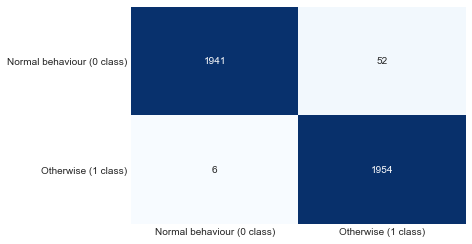

In [49]:
print(sns.heatmap(confusion_matrix(y_test_lda, y_pred), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

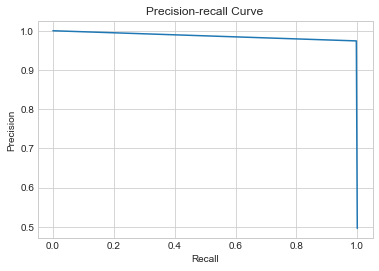

In [50]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test_lda, y_pred)
plt.plot(recall, precision)
plt.title("Precision-recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

## Logistic regression - Imbalance with LDA

In order to compare the results of the machine learning models I applied logistic regression using cross validation and the best hyperparameters in the dataset with dimension reduction by LDA but without data balance. When comparing the results the throughput of the process model using the unbalanced dataset is lower than when we balance it, which shows that balancing when there is a very large difference in classes is important. 1938 0 class values as a true positive values, in our dataset thats the honest biddings. 50 were predicted as False Positive, predict as a honest bid but can be a fraud. Over 220 1 class values, predict as a fraud and is a fraud. 5 was predicted as False Negative the model predict as a fraud and can be not a fraud. The accurancy of the model was: Testing score: 0.975 and Training score: 0.982.

In [51]:
from sklearn.model_selection import train_test_split
X_train_lda_imb, X_test_lda_imb, y_train_lda_imb, y_test_lda_imb = train_test_split(x_lda_imb, y_imb, test_size=0.35, random_state=42, shuffle=True)

In [52]:
log_clf = LogisticRegression(random_state = 42)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = True, n_jobs = -1)
best_clf = CV_log_clf.fit(X_train_lda_imb, y_train_lda_imb)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)
print (f'Accuracy train - : {best_clf.score(X_train_lda_imb, y_train_lda_imb):.3f}')
print (f'Accuracy test - : {best_clf.score(X_test_lda_imb, y_test_lda_imb):.3f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters for using this model is {'C': 1, 'penalty': 'l2'}
Accuracy train - : 0.982
Accuracy test - : 0.975


In [53]:
#Log with best hyperparameters
CV_log_clf = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = 42)

CV_log_clf.fit(X_train_lda_imb, y_train_lda_imb)
y_pred_lda_imb = CV_log_clf.predict(X_test_lda_imb)
y_score_lda_imb = CV_log_clf.decision_function(X_test_lda_imb)

AxesSubplot(0.125,0.125;0.775x0.755)


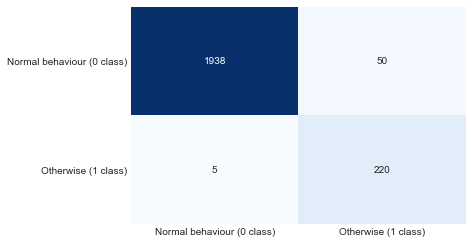

In [54]:
print(sns.heatmap(confusion_matrix(y_test_lda_imb, y_pred_lda_imb), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

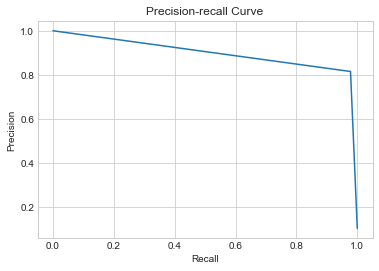

In [55]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test_lda_imb, y_pred_lda_imb)
plt.plot(recall, precision)
plt.title("Precision-recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

## Decision tree

Decision trees are widely used models for classification and regression, it is struct ured classifier.[8] The model is build using a sequence of “if” questions. That gets us to t he true answer most easily.This model was chosen because is easy to understand and dema nd less data preparation than others methods. [8] The result of this model aplication was 1953 0 class values as a true positive values, in our dataset thats the honest biddings. 40 were predicted as False Positive, predict as a honest bid but can be a fraud. Over 1950 1 class values, predict as a fraud and is a fraud, it means that if the fraud continue in the same frequecy if we have 3953 bids 1950 suggest a fraud. 10 was predicted as False Negative the model predict as a fraud and can be not a fraud. That's the accurancy of the model is Training score: 0.988 Testing score: 0.987.

In [56]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_lda, y_train_lda)
y_pred = tree.predict(X_test_lda)

In [57]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=42)
tree.fit(X_train_lda, y_train_lda)
y_pred_tree_lda = tree.predict(X_test_lda)

In [58]:
print('Training score: {:.3f}'.format(tree.score(X_train_lda,y_train_lda)))
print('Testing score: {:.3f}'.format(tree.score(X_test_lda,y_test_lda)))

Training score: 0.988
Testing score: 0.987


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1993
           1       0.98      0.99      0.99      1960

    accuracy                           0.99      3953
   macro avg       0.99      0.99      0.99      3953
weighted avg       0.99      0.99      0.99      3953

AxesSubplot(0.125,0.125;0.775x0.755)


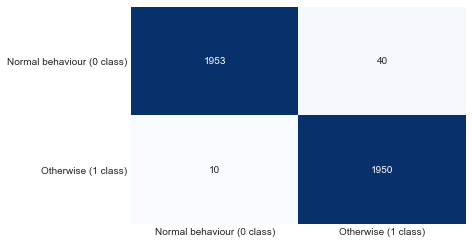

In [59]:
print(classification_report(y_test_lda, y_pred_tree_lda))
print(sns.heatmap(confusion_matrix(y_test_lda, y_pred_tree_lda), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

## Decision tree Hyperparameters and Cross Validation

To defining the best hyperparameters we use GridSearchCV that chosen the bers parameters to be used. The difference between decision tree with and without hyperparameters wasvery small, being only possible to notice in the confusion matrix. In it, to see that the acertive forecasts decreased from 3903 to 3902 using hyperparameters and cross validation. This may mean that with the size of the test caught without using cross-validation the acertive data would be larger, but using cross-variation this prediction becomes more reliable.

In [60]:
depth = range(1, 20)
leaf = range(1, 20)

In [61]:
grid = dict(max_depth=depth,min_samples_leaf=leaf)
grid_search = GridSearchCV(estimator=tree, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_lda, y_train_lda)

In [62]:
print("Best: %f 'The best parameters for using this model is' %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.987737 'The best parameters for using this model is' {'max_depth': 1, 'min_samples_leaf': 1}


In [63]:
tree = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1, random_state=1)
tree.fit(X_train_lda, y_train_lda)
y_pred_tree = tree.predict(X_test_lda)

In [64]:
print('Training score: {:.3f}'.format(tree.score(X_train_lda,y_train_lda)))
print('Testing score: {:.3f}'.format(tree.score(X_test_lda,y_test_lda)))

Training score: 0.988
Testing score: 0.987


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1993
           1       0.98      1.00      0.99      1960

    accuracy                           0.99      3953
   macro avg       0.99      0.99      0.99      3953
weighted avg       0.99      0.99      0.99      3953

AxesSubplot(0.125,0.125;0.775x0.755)


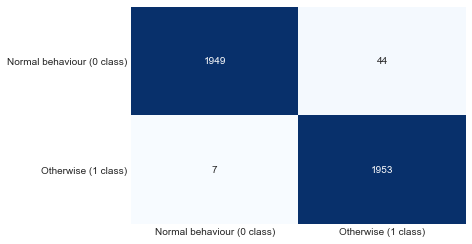

In [65]:
print(classification_report(y_test_lda, y_pred_tree))
print(sns.heatmap(confusion_matrix(y_test_lda, y_pred_tree), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

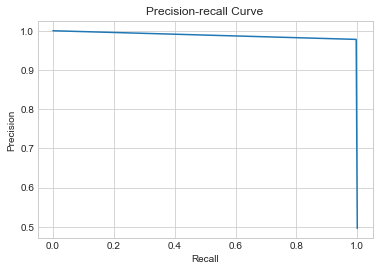

In [66]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test_lda, y_pred_tree)
plt.plot(recall, precision)
plt.title("Precision-recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

## Decision tree imbalance with LDA

In order to compare the results of the machine learning models I applied decision tree using cross validation and the best hyperparameters in the dataset with dimension reduction by LDA but without data balance. When comparing the results the throughput of the process model using the unbalanced dataset is lower than when we balance it, which shows that balancing when there is a positively difference in classes is important. 1946 0 class values as a true positive values, in our dataset thats the honest biddings. 42 were predicted as False Positive, predict as a honest bid but can be a fraud. Over 214 1 class values, predict as a fraud and is a fraud. 11 was predicted as False Negative the model predict as a fraud and can be not a fraud. The accurancy of the model was: Training score: 0.987; Testing score: 0.976

In [67]:
depth = range(1, 20)
leaf = range(1, 20)

In [68]:
grid = dict(max_depth=depth,min_samples_leaf=leaf)
grid_search = GridSearchCV(estimator=tree, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_lda_imb, y_train_lda_imb)

In [69]:
print("Best: %f 'The best parameters for using this model is' %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.984177 'The best parameters for using this model is' {'max_depth': 6, 'min_samples_leaf': 5}


In [70]:
tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=1)
tree.fit(X_train_lda_imb, y_train_lda_imb)
y_pred_tree_imb = tree.predict(X_test_lda_imb)

In [71]:
print('Training score: {:.3f}'.format(tree.score(X_train_lda_imb,y_train_lda_imb)))
print('Testing score: {:.3f}'.format(tree.score(X_test_lda_imb,y_test_lda_imb)))

Training score: 0.987
Testing score: 0.976


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1988
           1       0.84      0.95      0.89       225

    accuracy                           0.98      2213
   macro avg       0.92      0.96      0.94      2213
weighted avg       0.98      0.98      0.98      2213

AxesSubplot(0.125,0.125;0.775x0.755)


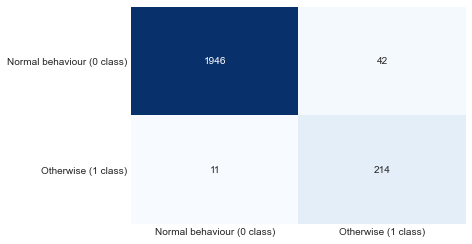

In [72]:
print(classification_report(y_test_lda_imb, y_pred_tree_imb))
print(sns.heatmap(confusion_matrix(y_test_lda_imb, y_pred_tree_imb), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

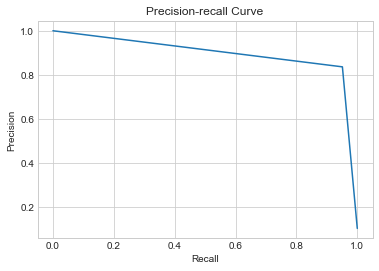

In [73]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test_lda_imb, y_pred_tree_imb)
plt.plot(recall, precision)
plt.title("Precision-recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [74]:
from PIL import Image

myImage = Image.open("table super.png");


myImage.show();

## Conlusion
In conclusion, this work used a dataset that provides for the risk to have frauds in futures bets for products in e-bay website. The class was defined as the variable dependent on the process, while all others were considered independent. Through the heatmap it was notable that four of the independent variables affected more the independent variable were them: Sucessive Outbidding, Bidding Ratio, Winning Ratio and Bidder Tendency. Missing values and duplicate values wasn’t present in the dataset and outliers were not treated due to their importance in the model to predict future fraud.
Using the same number of columns the LDA performed much better than the PCA, therefore the ML models was applied using only the variables obtained in the LDA.
As a way of predicting data, the accuracy of 2 methods of  supervised machine learning was analyzed. These being: Logistic regression and decision tree. Decision tree was the metodo that got the best accurancy. Therefore, it is concluded that if it were necessary to analyze more deeply the dataset, the most indicated would be to use the decision tree as a way to make predictions. 
Therefore, all the steps were important to understand that some models are more appropriate for data analysis, and test the models and define the best is a path to the development of good analyses.
For future work it is intended to readjust the decision tree model, considering  now other factors such as relationship between the seller and the bettors. 


[1]	Brownlee, J. (n.d.). Data Preparation for Machine Learning. 1.1 ed. pp.38, 39 243.

[2]	A K Md Ehsanes Saleh, Arashi, M. and B M Golam Kibria (2019). Theory of Ridge Regression Estimation with Applications. Hoboken, Nj, Usa John Wiley & Sons, Inc. pp. 143


[3]	Devay, A. (2020). Modelos de Predição | Regressão de Ridge e Lasso. [online] Medium. Available at: https://medium.com/turing-talks/turing-talks-20- regress%C3%A3o-de-ridge-e-lasso-a0fc467b5629. [Accessed 14 Apr. 2022].

[4]	Wickramasinghe, S. (n.d.). Bias & Variance in Machine Learning: Concepts & Tutorials. [online] BMC Blogs. Available at: https://www.bmc.com/blogs/bias- variance-machine-learning/.. [Accessed 14 Apr. 2022].

[5]	Müller, A. and Guido, S., n.d. Introduction to machine learning with Python. 1st ed. United States: O’Reilly Media, Inc., 1005 Gravenstein Highway North, Sebastopol, CA 95472., pp.28;47:49;56; 81
[6]	docs.aws.amazon.com. (n.d.). Model Fit: Underfitting vs. Overfitting - Amazon Machine Learning. [online] Available at: https://docs.aws.amazon.com/machine- learning/latest/dg/model-fit-underfitting-vs-overfitting.html. [Accessed 14 Apr. 2022].

[7]	Corporate Finance Institute. (n.d.). Ridge. [online] Available at: https://corporatefinanceinstitute.com/resources/knowledge/other/ridge/ [Accessed 14 Apr. 2022].

[8]	umar (2021). Decision Tree: [online] Artificial Intelligence. Available at: https://artificialintelligencestechnology.com/ml/decision-tree/ [Accessed 14 Apr. 2022].

[9]	umar (2021). Support Vector Machine (SVM). [online] Artificial Intelligence. Available at: https://artificialintelligencestechnology.com/ml/support-vector-machine- svm/ [Accessed 14 Apr. 2022].
 


[10]	Awad, M. and Khanna, R. (2015). Efficient Learning Machines : Theories, Concepts, and Applications for Engineers and System Designers. Berkeley, Ca:
Apressopen. pp.67


[11]	umar (2021). Logistic Regression. [online] Artificial Intelligence. Available at: https://artificialintelligencestechnology.com/ml/logistic-regression/ [Accessed 14 Apr. 2022].

[12]	umar (2021). Linear Regression: [online] Artificial Intelligence. Available at: https://artificialintelligencestechnology.com/ml/linear-regression/ [Accessed 14 Apr. 2022].

[13]	www.superdatascience.com. (n.d.). SuperDataScience. [online] Available at: https://www.superdatascience.com/blogs/regression-classification-multiple-linear- regression [Accessed 14 Apr. 2022].
[14]	pt.gadget-info.com. (n.d.). Diferença entre Classificação e Regressão. [online] Available at: https://pt.gadget-info.com/difference-between-classification [Accessed 15 Apr. 2022].
[15]Mohammed, M. (2020). MACHINE LEARNING : algorithms and applications. S.L.: Crc Press.

[16]michael-fuchs-python.netlify.app. (n.d.). Linear Discriminant Analysis (LDA) - Michael Fuchs Python. [online] Available at: https://michael-fuchs-python.netlify.app/2020/08/07/linear-discriminant-analysis-lda/#pca-vs.-lda [Accessed 15 May 2022].

[17]Intellias. (2019). How to Use Machine Learning in Fraud Detection and Prevention. [online] Available at: https://intellias.com/how-to-use-machine-learning-in-fraud-detection/.

[18] Sas.com. (2017). Fraud detection and machine learning: What you need to know. [online] Available at: https://www.sas.com/en_ie/insights/articles/risk-fraud/fraud-detection-machine-learning.html [Accessed 7 Nov. 2019].

## Appendix - Data dicionary

In [75]:
myApx2 = Image.open("Datacdic.png");
myApx2.show();